In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('sab-bma.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
9735,CCATTTCCCACACGAGAGCCCGGCTTTCCTGTCACATTTGGTAAGG...,AGGCCTAACGCCTTTATTATATAACCACTCTTAGCCCATAGGACTA...
9736,TTGATAGGTCATTTACGGCGCGCGAGCCGCATAGGGTAGTAGGGAT...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGATATGGGCCC...
9737,GTTAGTGACCTAGCCGGGCTATTGGCGAGACTTACCTAACGGAGTT...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9738,CTGTTCAGACGACGATATACGGCCCTGCATTGTATTGTAAAAGCGT...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
def print_diff(ref_strand, recons_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = recons_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [9]:
# AGCT
# TAGC

# SM: (0, _ -> T), (4, _ -> T)
# Prof: (0, 1, 2, 3)

count_pos = [0] * 5
def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1
print_diff2("AGCT", "TAGC")
print(count_pos)

ref_strand = "AGCT"
recons_strand = "TAGC"
a = 0
b = 0
for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
    was = ref_strand[a:match.a]
    now = recons_strand[b:match.b]

    a = match.a + match.size
    b = match.b + match.size

    print(match, was, now, match.a)


    if was == '' and now == '':
        pass
    else:
        pass
        # print('{}|{}'.format(was, now), end=', ')
        # pairs += [(was, now, match.a)]
        # pairs_no_pos += [(was, now)]


[1, 1, 1, 1, 0]
Match(a=0, b=1, size=3)  T 0
Match(a=4, b=4, size=0) T  4


100%|██████████| 9740/9740 [00:00<00:00, 62797.48it/s]


[7178, 7133, 7170, 7176, 7195, 7151, 7199, 7166, 7138, 7218, 7227, 7260, 7232, 7126, 7206, 7157, 7228, 7177, 7146, 7282, 7217, 7187, 7239, 7309, 7195, 7229, 7180, 7191, 7221, 7190, 7204, 7207, 7220, 7157, 7254, 7212, 7273, 7194, 7195, 7143, 7174, 7226, 7252, 7122, 7211, 7106, 7245, 7246, 7163, 7256, 7223, 7236, 7153, 7195, 7225, 7251, 7249, 7268, 7328, 7207, 7248, 7176, 7256, 7215, 7204, 7145, 7225, 7269, 7170, 7200, 7302, 7213, 7226, 7177, 7229, 7165, 7225, 7211, 7292, 7184, 7283, 7182, 7195, 7240, 7159, 7257, 7259, 7241, 7147, 7131, 7231, 7178, 7226, 7185, 7211, 7132, 7099, 7205, 7192, 7233, 7175, 7140, 7190, 7232, 7231, 7195, 7133, 7146, 7160, 7125, 0]


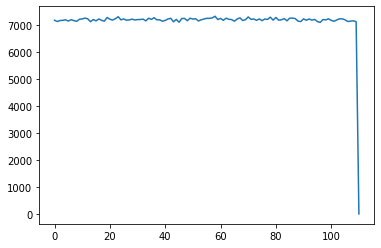

In [10]:
strand_len = 110
count_pos = [0] * (strand_len + 1)

def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff2(ref_strands[i], noisy_strands[i])

import matplotlib.pyplot as plt
plt.plot(range(strand_len + 1), count_pos)
print(count_pos)


In [11]:
pairs = []
pairs_no_pos = []
for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])

100%|██████████| 9740/9740 [00:12<00:00, 753.01it/s]


In [12]:
import numpy as np


In [13]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [14]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

 -> AAGAC 6
 -> TCCAC 6
CTCCT ->  6
 -> AAGTT 6
 -> CACCA 6
CGAGG ->  6
 -> CTTGC 6
 -> GCCAG 6
T -> AGGA 6
 -> TTACC 6
TCCCT ->  6
GAGGG ->  6
AGGGA ->  6
GCAAA ->  6
AATTA ->  6
G -> ACAT 6
C -> GTGA 6
AAAC -> G 6
G -> ACCA 6
 -> CTGGC 6
C -> TAG 6
CGCA -> T 6
T -> ACAA 6
AA -> TCC 6
CGCC -> A 6
CTAGC ->  6
TCCC -> G 6
CC -> GGG 6
GAGGA ->  6
CATTT ->  6
CGCCC ->  6
T -> AAAA 6
TGATG ->  6
 -> TGGCT 6
GATC ->  6
 -> AGGTT 6
 -> TCCCT 6
T -> CAG 6
TTT -> CC 6
TCCTC ->  6
 -> GATGAA 6
AC -> GT 6
 -> CTTAA 6
 -> AAGC 6
AGAGG ->  6
T -> CGCC 6
 -> AAGAA 6
AAGGG -> C 6
 -> TGGGG 6
AA -> GGC 6
C -> GGGT 6
C -> TATT 6
CC -> GAG 6
CGAT ->  6
T -> AGC 6
 -> GAACC 6
 -> TCTCC 6
GGTCT ->  6
 -> GGACG 6
CCAAG ->  6
AAATG ->  6
GAATT ->  6
 -> TCGCG 6
TTTAT ->  6
 -> TTGGA 6
AAGA -> T 6
TT -> CGC 6
GAACG ->  6
 -> CCACT 6
 -> GTGCT 6
 -> ACGGAG 6
AACTA ->  6
GTGT -> A 6
A -> CGCT 6
 -> AATTC 6
A -> GTGT 6
 -> TCAAT 6
TTAT -> C 6
TT -> AGG 6
TTTGG ->  6
TCTC -> G 6
ATGAT ->  6
TCACC ->  6
 -> CCGC

In [15]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [16]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


C -> G @ 8 6
T -> G @ 101 6
CA ->  @ 95 6
G -> A @ 3 6
C -> G @ 31 6
C -> G @ 19 6
G -> C @ 43 6
G -> C @ 48 6
CA ->  @ 31 6
G -> A @ 35 6
G -> A @ 40 6
GG ->  @ 18 6
T -> C @ 80 6
T -> G @ 103 6
 -> CG @ 103 6
G -> C @ 63 6
G -> C @ 92 6
G -> C @ 62 6
C -> G @ 32 6
G -> CT @ 110 6
G -> C @ 60 6
C -> G @ 39 6
CA ->  @ 6 6
C -> G @ 65 6
C -> G @ 56 6
 -> AA @ 106 6
T -> C @ 23 6
T -> G @ 41 6
CA ->  @ 28 6
 -> AAA @ 2 6
 -> AA @ 100 6
G -> C @ 78 6
T -> C @ 60 6
T -> C @ 69 6
C -> G @ 95 6
G -> A @ 104 6
 -> AAA @ 4 6
T -> C @ 31 6
GG ->  @ 23 6
 -> AAA @ 18 6
T -> C @ 96 6
T -> G @ 48 6
G -> A @ 14 6
G -> A @ 16 6
C -> G @ 48 6
T -> G @ 18 6
C -> G @ 62 6
C -> G @ 9 6
T -> C @ 21 6
GG ->  @ 22 6
C -> G @ 45 6
G -> A @ 23 6
G -> A @ 27 6
T -> G @ 54 6
T -> G @ 22 6
C -> G @ 27 6
CG ->  @ 5 6
 -> CG @ 106 6
 -> TAC @ 0 6
 -> CA @ 43 6
 -> GG @ 43 6
 -> CAA @ 4 6
C -> T @ 46 6
 -> CA @ 32 6
 -> GG @ 31 6
 -> CA @ 29 6
 -> GG @ 25 6
 -> GG @ 19 6
 -> TA @ 54 6
 -> CA @ 21 6
 -> GG @ 11 6
T

In [17]:
import matplotlib.pyplot as plt

In [18]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[5602, 2596, 2358, 2345, 2272, 2263, 2086, 2062, 1916, 1904, 1847, 1850, 1740, 1719, 1652, 1648, 1654, 1569, 1617, 1553, 1425, 1446, 1447, 1432, 1351, 1430, 1285, 1342, 1332, 1304, 1286, 1297, 1270, 1212, 1254, 1250, 1207, 1162, 1139, 1153, 1090, 1144, 1151, 1141, 1160, 1134, 1109, 1079, 1084, 1074, 1017, 1062, 1055, 1049, 1089, 1045, 1052, 1037, 1031, 1039, 1047, 1016, 1002, 1013, 1005, 982, 985, 1022, 964, 984, 998, 979, 980, 961, 1022, 944, 965, 961, 1004, 964, 1023, 935, 935, 968, 1024, 969, 1000, 944, 986, 969, 1037, 1031, 1067, 1010, 1042, 1046, 1108, 1057, 1078, 1138, 1121, 1180, 1164, 1147, 1203, 1215, 1209, 1141, 1107, 1049, 9183]


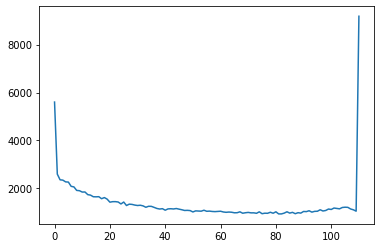

In [19]:
plt.plot(range(strand_len + 1), pos_counts)

In [20]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[211, 47, 61, 61, 54, 59, 57, 56, 59, 49, 41, 42, 47, 34, 49, 40, 51, 36, 32, 39, 35, 32, 35, 31, 28, 30, 32, 27, 37, 18, 26, 29, 27, 34, 26, 31, 16, 27, 34, 22, 25, 27, 20, 32, 27, 32, 22, 18, 21, 17, 23, 19, 19, 22, 29, 26, 20, 24, 28, 21, 26, 20, 21, 26, 18, 23, 24, 14, 23, 23, 16, 21, 25, 26, 19, 18, 24, 15, 17, 24, 15, 21, 18, 19, 20, 12, 21, 17, 21, 19, 23, 28, 23, 17, 23, 21, 22, 22, 24, 20, 25, 26, 32, 27, 27, 24, 26, 29, 43, 46, 55]


In [21]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


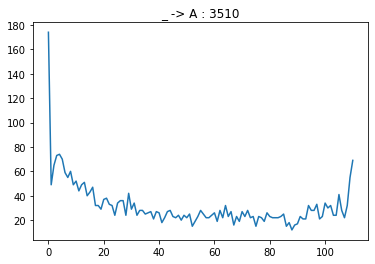

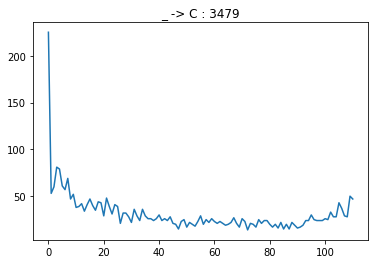

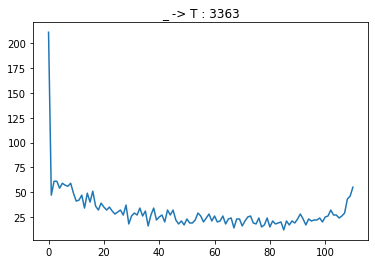

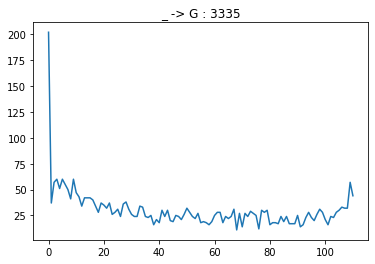

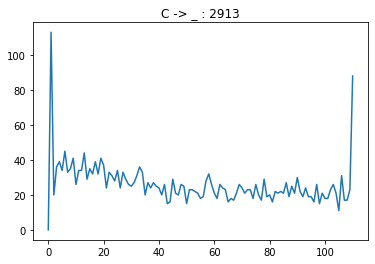

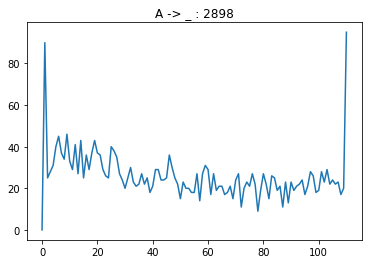

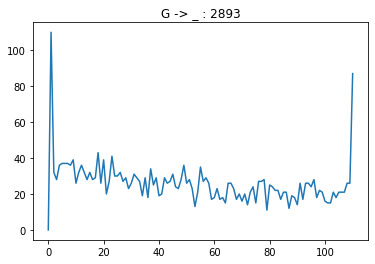

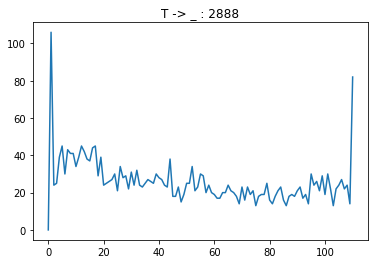

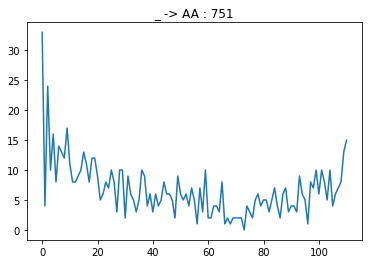

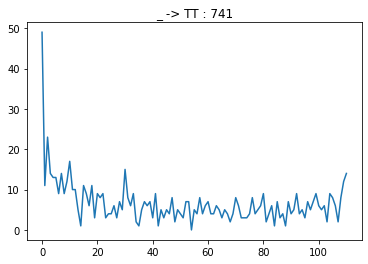

In [22]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [23]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)